

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Author: Bo Yan</p>

# DSE 260A

# Table of Content

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import re
import seaborn as sns
import nltk
from math import sqrt
from math import pi
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from kneed import KneeLocator, DataGenerator
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from wordcloud import WordCloud

%matplotlib inline

# Step 1: Load Datasets

In [2]:
flight_8 = pd.read_csv('flightlist_20210801_20210831.csv')

In [3]:
print("\nShape of DataFrame:\n", flight_8.shape)


Shape of DataFrame:
 (2794400, 16)


In [4]:
print("\nHead of DataFrame:\n", flight_8.head())


Head of DataFrame:
   callsign  number  icao24 registration typecode origin destination  \
0   N640EE     NaN  a865a4          NaN      NaN    NaN        KAPC   
1    TRA5C  HV5818  4853d4       PH-HXK     B738    NaN        EHAM   
2   N257LM     NaN  a27285       N257LM      NaN   AK29        6AK9   
3   NKS933   NK933  a6b911       N532NK     A319    NaN        KLAS   
4  JBU1318  B61318  a3e94e       N351JB     E190    NaN        KBOS   

                   firstseen                   lastseen  \
0  2021-08-01 00:00:03+00:00  2021-08-01 00:38:04+00:00   
1  2021-08-01 00:00:03+00:00  2021-08-01 00:26:53+00:00   
2  2021-08-01 00:00:03+00:00  2021-08-01 00:45:09+00:00   
3  2021-08-01 00:00:03+00:00  2021-08-01 00:26:48+00:00   
4  2021-08-01 00:00:03+00:00  2021-08-01 00:26:41+00:00   

                         day  latitude_1  longitude_1  altitude_1  latitude_2  \
0  2021-08-01 00:00:00+00:00   35.147690  -119.243588     10363.2   38.222534   
1  2021-08-01 00:00:00+00:00   51.7

In [5]:
flight_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794400 entries, 0 to 2794399
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   callsign      object 
 1   number        object 
 2   icao24        object 
 3   registration  object 
 4   typecode      object 
 5   origin        object 
 6   destination   object 
 7   firstseen     object 
 8   lastseen      object 
 9   day           object 
 10  latitude_1    float64
 11  longitude_1   float64
 12  altitude_1    float64
 13  latitude_2    float64
 14  longitude_2   float64
 15  altitude_2    float64
dtypes: float64(6), object(10)
memory usage: 341.1+ MB


# Step 2: Explore the datasets

In this step, we will explore what is present in the data and how the data is organized and determine what common features allow you to merge the datasets.  

We will answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

We will use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

## Data Quality Issues and Data Cleaning

### Identify data quality issues and do data cleaning.

* Find column with most missing values

In [6]:
for col in flight_8:
    print(col, len(flight_8[flight_8[col].isnull()]))

callsign 0
number 2000404
icao24 10
registration 624468
typecode 1183850
origin 648372
destination 481989
firstseen 0
lastseen 0
day 0
latitude_1 0
longitude_1 0
altitude_1 0
latitude_2 85
longitude_2 85
altitude_2 31908


* Drop unused columns

In [7]:
flight_8 = flight_8.drop(["registration", "typecode"], axis = 1)
flight_8.shape

(2794400, 14)

* Drop any rows with NaN

In [8]:
flight_8 = flight_8.dropna(axis = 0)
flight_8.shape

(501160, 14)

* Drop duplicated rows

In [9]:
flight_8 = flight_8.drop_duplicates()

flight_8.shape

(501160, 14)

* Convert DateTime to Date

In [10]:
# for item in flight_8.day:
#     flight_8.day = item.replace(" 00:00:00+00:00", "")

In [11]:
flight_8.head()

,callsign,number,icao24,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
20,DAL1358,DL1358,abc573,PANC,KSEA,2021-08-01 00:00:03+00:00,2021-08-01 03:19:48+00:00,2021-08-01 00:00:00+00:00,61.202820,-150.016054,0.0,47.444644,-122.318045,83.82
26,AAL2251,AA2251,ac4dfb,KGPM,KBWI,2021-08-01 00:00:03+00:00,2021-08-01 02:26:07+00:00,2021-08-01 00:00:00+00:00,32.771347,-97.014825,1219.2,39.164978,-76.663135,38.10
1854,UAL815,UA815,a8f77c,KFDK,KIAD,2021-08-01 00:00:05+00:00,2021-08-01 00:13:19+00:00,2021-08-01 00:00:00+00:00,39.451675,-77.370320,1524.0,38.945812,-77.440964,99.06
1888,SIL76,3M76,a968c5,KFLL,KORL,2021-08-01 00:00:05+00:00,2021-08-01 00:47:29+00:00,2021-08-01 00:00:00+00:00,26.081590,-80.132059,304.8,28.603729,-81.282930,998.22
1943,AAL72,AA72,ab3fc4,YSSY,KLAX,2021-08-01 00:00:05+00:00,2021-08-01 12:36:59+00:00,2021-08-01 00:00:00+00:00,-33.831528,151.223051,914.4,33.947428,-118.428612,0.00


### Conclusions

Through exploring the data, there are several data qualities issues that needs to be cleaned.
1. Missing values (drop)
2. Duplicated rows if any (drop)
3. Unused columns (drop)
4. Data type (convert DateTime to Date)

## Data Distribution

Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

### Skew distribution

In [12]:
print(flight_8.skew())

latitude_1    -2.479718
longitude_1    1.412342
altitude_1     1.858958
latitude_2    -2.459872
longitude_2    1.415362
altitude_2     8.224269
dtype: float64


array([[<AxesSubplot:title={'center':'latitude_1'}>,
        <AxesSubplot:title={'center':'longitude_1'}>],
       [<AxesSubplot:title={'center':'altitude_1'}>,
        <AxesSubplot:title={'center':'latitude_2'}>],
       [<AxesSubplot:title={'center':'longitude_2'}>,
        <AxesSubplot:title={'center':'altitude_2'}>]], dtype=object)

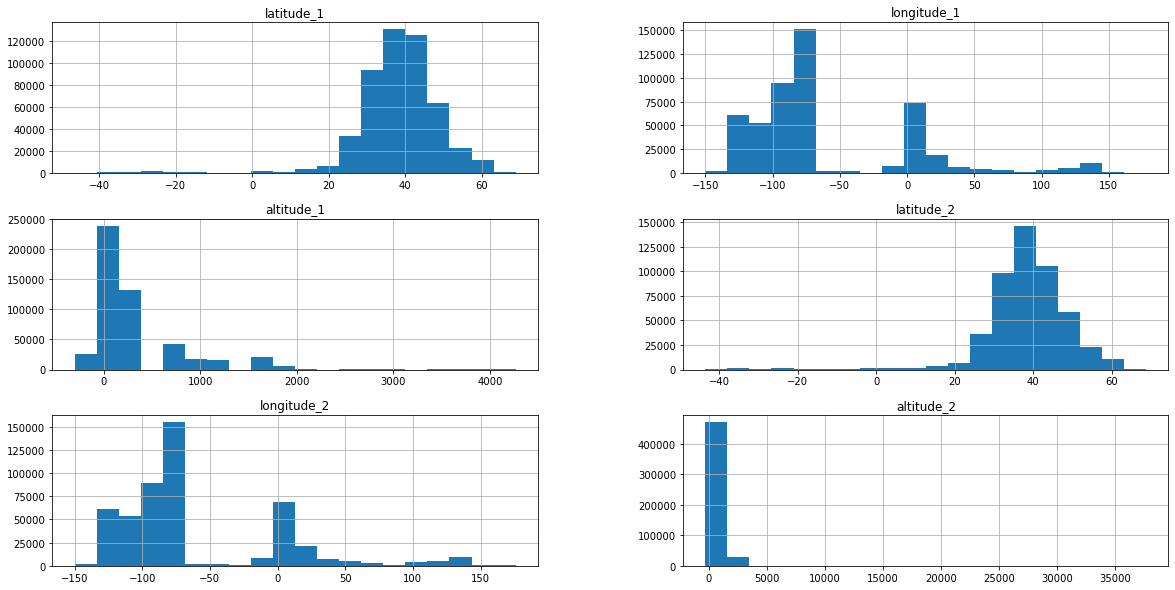

In [13]:
flight_8.hist(figsize = (20,10), bins = 20)

### Outlines

<AxesSubplot:>

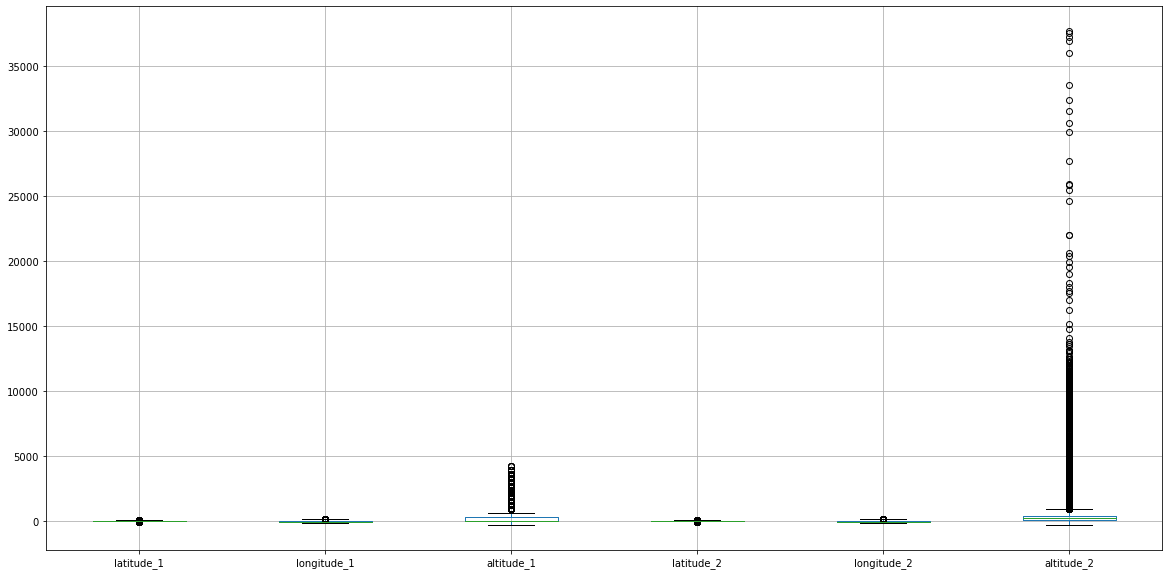

In [14]:
flight_8.boxplot(figsize = (20,10))

### Conclusions

1. Highly skewed distribution: latitude_1, longitude_1, altitude_1, latitude_2, longitude_2, and altitude_2.

2. Positive skewness values such as longitude_1, altitude_1, longitude_2, and altitude_2 indicate asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.

3. Negative skewness values such as latitude_1 and latitude_2 indicate asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

4. Both altitude_1 and altitude_2 attributes have lots of outliers.


## Common Trends

### Geolocation trends

In [15]:
print(flight_8['latitude_1'].describe())

count    501160.000000
mean         38.542382
std          11.168172
min         -46.416957
25%          33.658127
50%          39.702402
75%          43.663147
max          68.848892
Name: latitude_1, dtype: float64


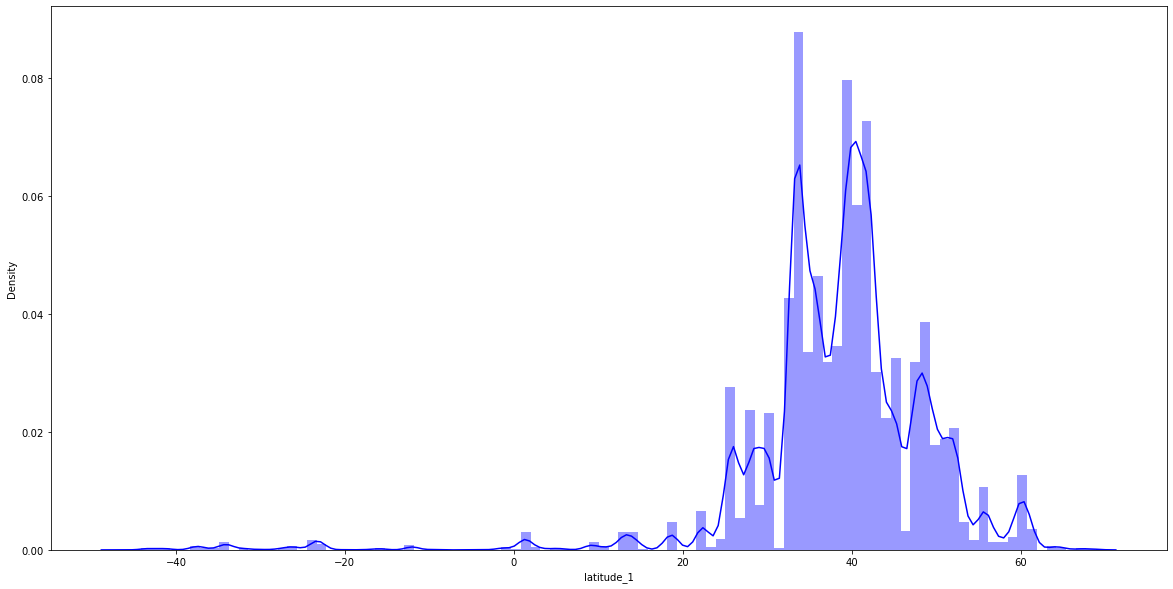

In [16]:
plt.figure(figsize = (20, 10))
sns.distplot(flight_8["latitude_1"], color='b', bins=100, hist_kws={'alpha': 0.4});

In [17]:
print(flight_8['latitude_2'].describe())

count    501160.000000
mean         38.414781
std          11.197446
min         -43.501670
25%          33.700058
50%          39.566345
75%          43.565365
max          68.855118
Name: latitude_2, dtype: float64


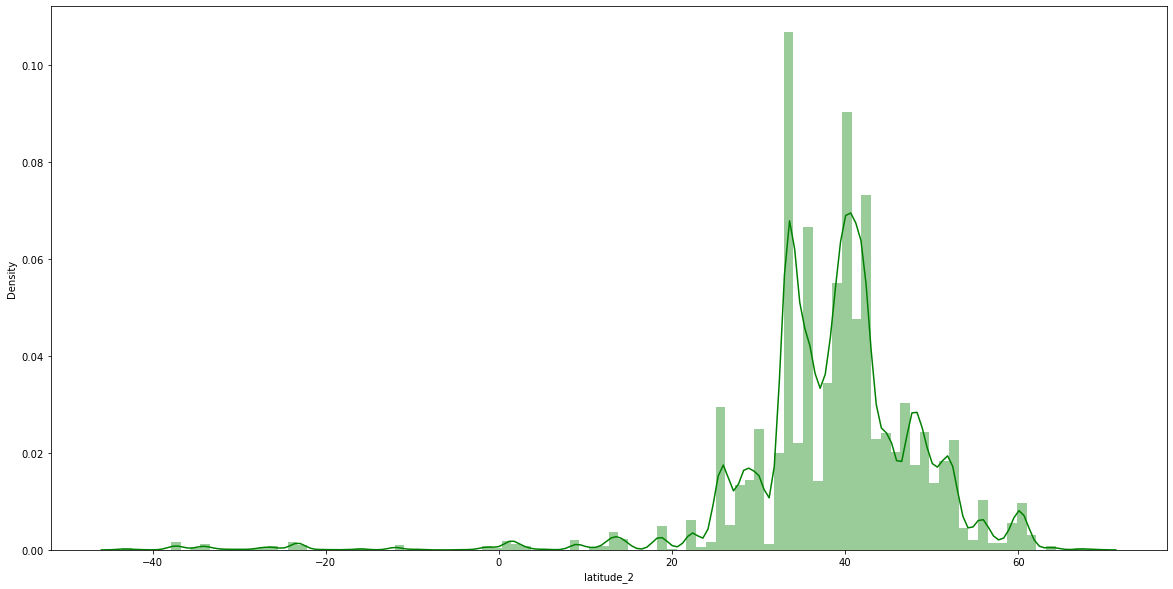

In [18]:
plt.figure(figsize=(20, 10))
sns.distplot(flight_8['latitude_2'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [19]:
print(flight_8['longitude_1'].describe())

count    501160.000000
mean        -59.625021
std          62.468907
min        -150.110910
25%         -97.051037
50%         -81.327547
75%          -0.468395
max         177.976013
Name: longitude_1, dtype: float64


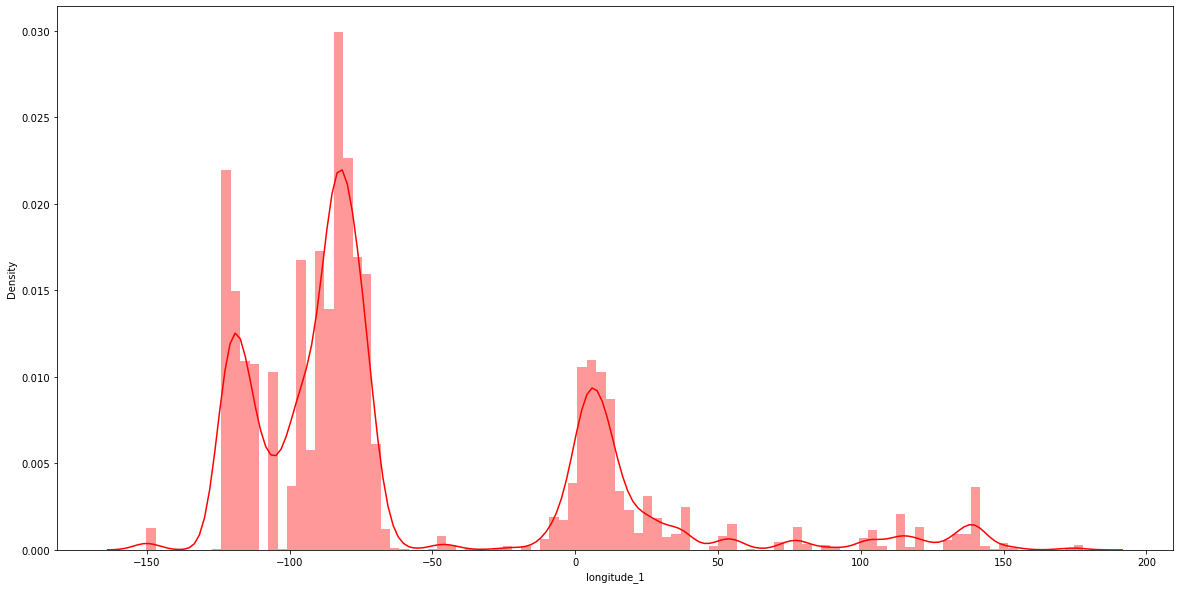

In [20]:
plt.figure(figsize=(20, 10))
sns.distplot(flight_8['longitude_1'], color='r', bins=100, hist_kws={'alpha': 0.4});

In [21]:
print(flight_8['longitude_2'].describe())

count    501160.000000
mean        -59.672285
std          62.565395
min        -150.032247
25%         -97.220173
50%         -81.653648
75%          -0.592127
max         175.909384
Name: longitude_2, dtype: float64


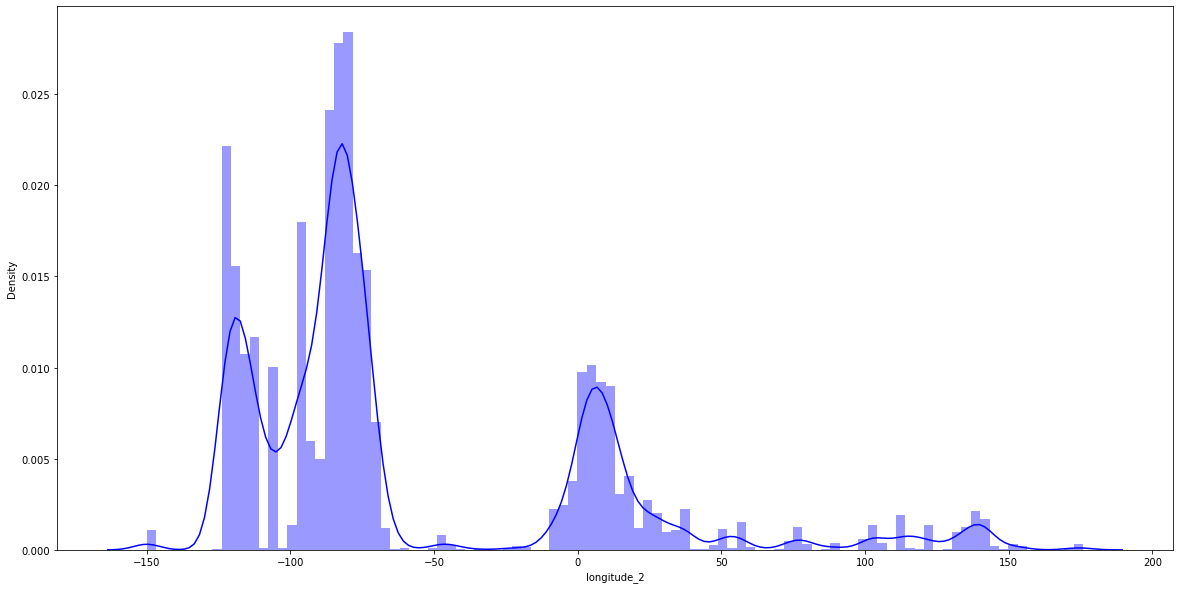

In [22]:
plt.figure(figsize=(20, 10))
sns.distplot(flight_8['longitude_2'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [23]:
print(flight_8['altitude_1'].describe())

count    501160.000000
mean        286.506283
std         473.464807
min        -304.800000
25%           0.000000
50%           0.000000
75%         304.800000
max        4267.200000
Name: altitude_1, dtype: float64


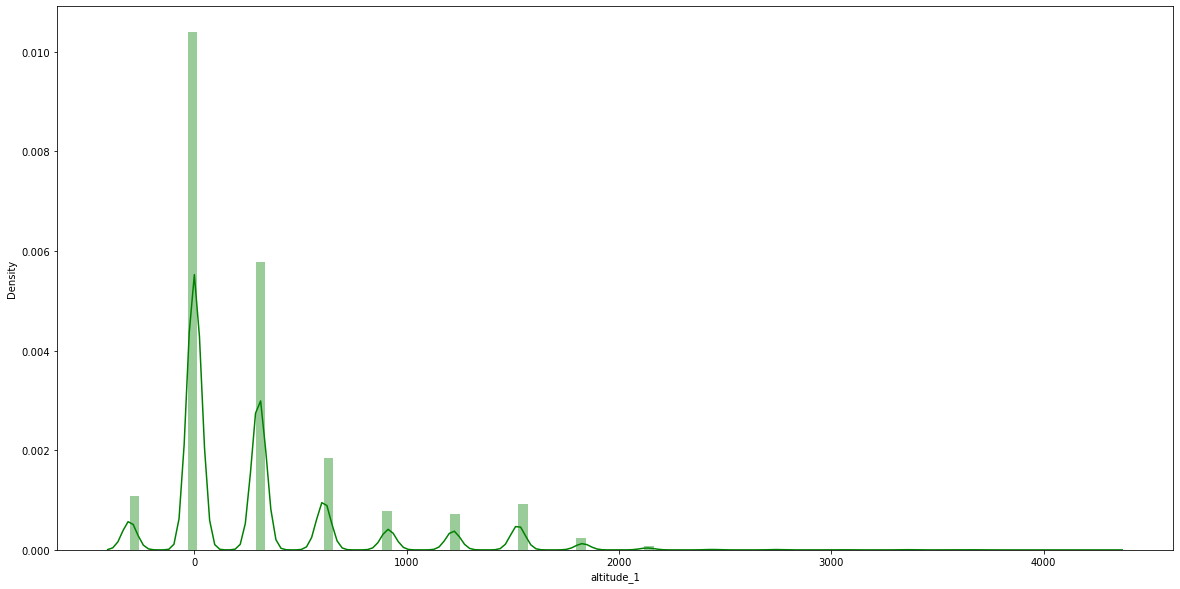

In [24]:
plt.figure(figsize=(20, 10))
sns.distplot(flight_8['altitude_1'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [25]:
print(flight_8['altitude_2'].describe())

count    501160.000000
mean        436.105117
std         680.720832
min        -281.940000
25%          99.060000
50%         236.220000
75%         434.340000
max       37703.760000
Name: altitude_2, dtype: float64


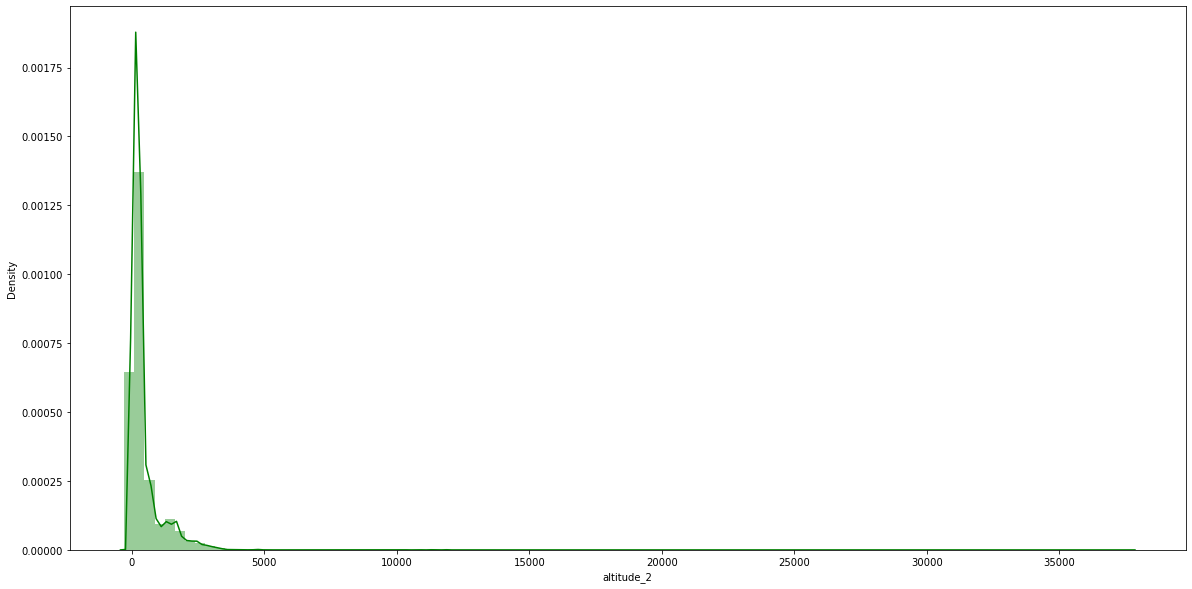

In [26]:
plt.figure(figsize=(20, 10))
sns.distplot(flight_8['altitude_2'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [27]:
# sns.set_context({"figure.figsize": (20, 10)})
# cp = sns.countplot(x = "latitude_1",data = flight_8, palette = "Set1",order = flight_8['latitude_1'].value_counts().index)
# cp.set_xticklabels(cp.get_xticklabels(), rotation = -45, ha = "left")
# cp.set_yticklabels(cp.get_yticklabels(), rotation = 0, ha = "right")
# plt.title('Callsign in different latitude_1',size = 20)

Text(0.5, 1.0, 'Callsign in different altitude_1')

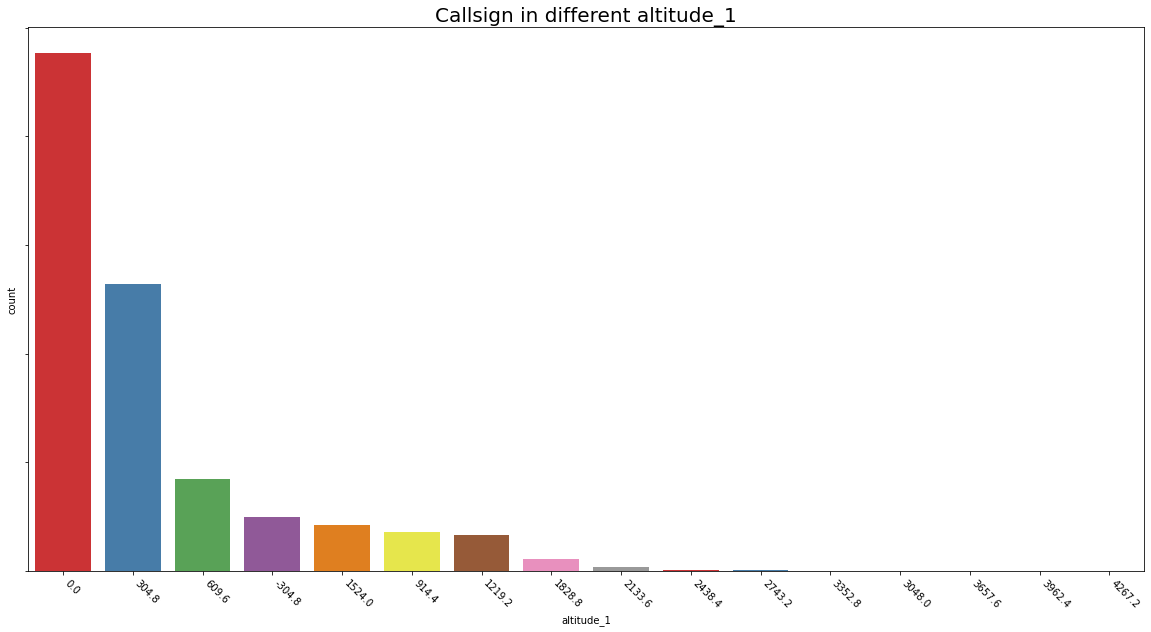

In [28]:
sns.set_context({"figure.figsize": (20, 10)})
cp = sns.countplot(x = "altitude_1",data = flight_8, palette = "Set1",order = flight_8['altitude_1'].value_counts().index)
cp.set_xticklabels(cp.get_xticklabels(), rotation = -45, ha = "left")
cp.set_yticklabels(cp.get_yticklabels(), rotation = 0, ha = "right")
plt.title('Callsign in different altitude_1',size = 20)

Text(0.5, 1.0, 'Callsign in different altitude_2')

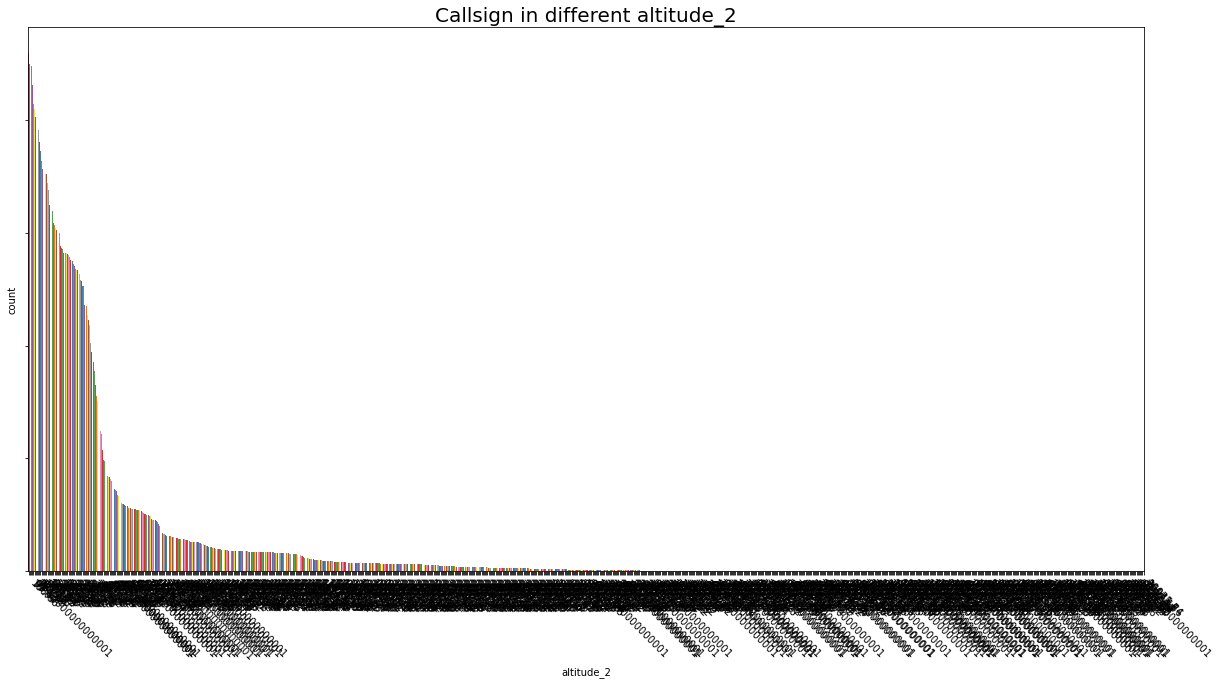

In [29]:
sns.set_context({"figure.figsize": (20, 10)})
cp = sns.countplot(x = "altitude_2",data = flight_8, palette = "Set1",order = flight_8['altitude_2'].value_counts().index)
cp.set_xticklabels(cp.get_xticklabels(), rotation = -45, ha = "left")
cp.set_yticklabels(cp.get_yticklabels(), rotation = 0, ha = "right")
plt.title('Callsign in different altitude_2',size = 20)

In [30]:
# for i in range(0, len(flight_8.columns), 5):
#     sns.pairplot(data=flight_8,
#                 x_vars=flight_8.columns[i:i+5],
#                 y_vars=['altitude_1'])

In [31]:
# for i in range(0, len(flight_8.columns), 5):
#     sns.pairplot(data=flight_8,
#                 x_vars=flight_8.columns[i:i+5],
#                 y_vars=['altitude_2'])

### Conclusions

1. Most of the callsigns are in the altitude of 0.0.

2. Most of the latitude_1 and latitude_2 belong to 30 to 50.

3. Most of the longitude_1 is in range -175 to -80.

4. Most of the altitude_1 and altitude_2 are around 0.

## Variable Relationships

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

### Heatmap and scatter

<AxesSubplot:>

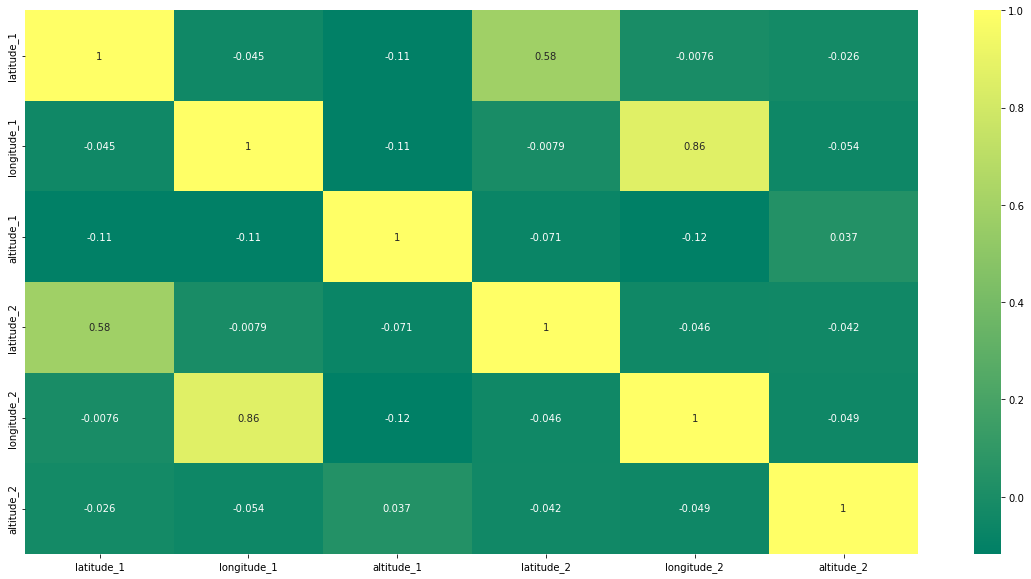

In [35]:
sns.heatmap(flight_8.corr(),annot = True,cmap = "summer")

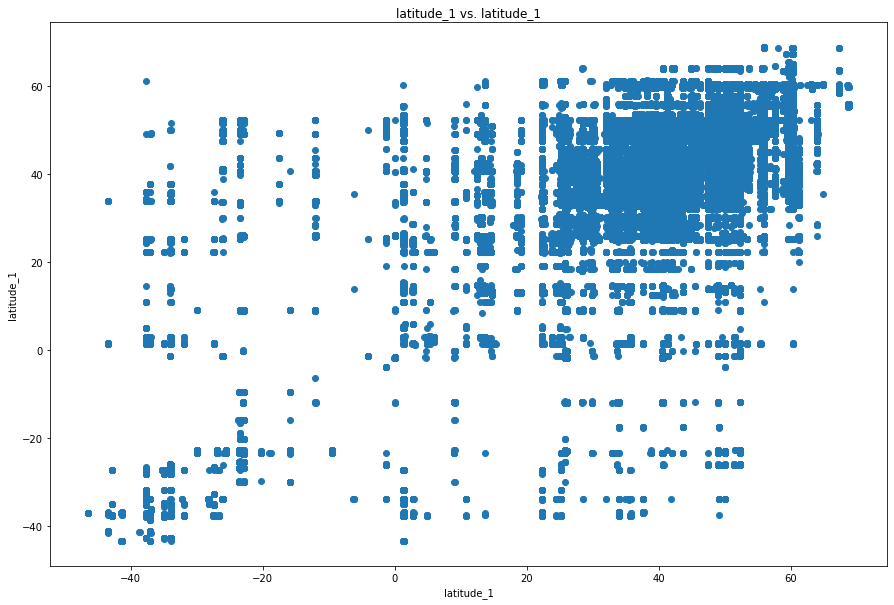

In [37]:
plt.figure(figsize = (15,10))
plt.scatter(x = flight_8['latitude_1'], y = flight_8['latitude_2'])
plt.title('latitude_1 vs. latitude_2')
plt.xlabel('latitude_1')
plt.ylabel('latitude_2')
plt.show()

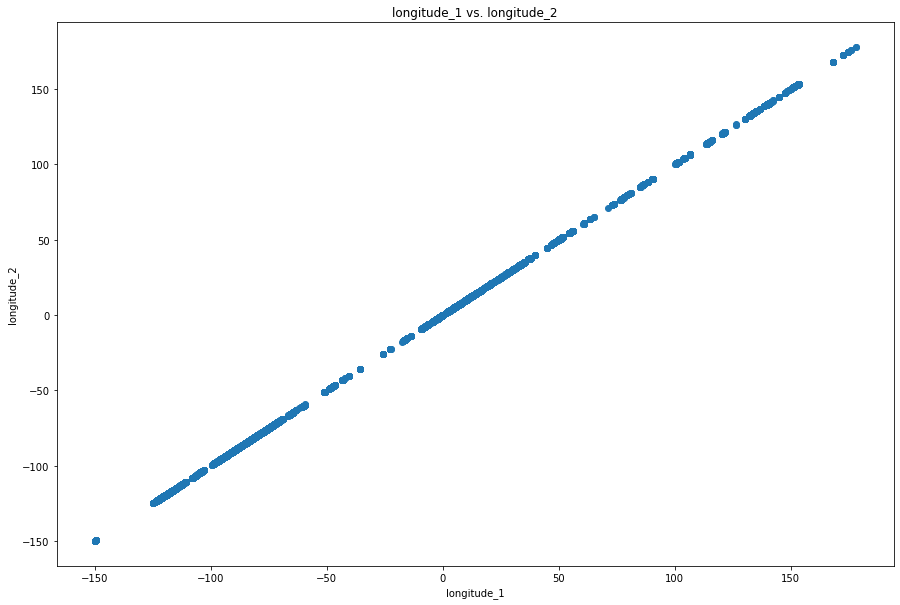

In [38]:
plt.figure(figsize = (15,10))
plt.scatter(x = flight_8['longitude_1'], y = flight_8['longitude_1'])
plt.title('longitude_1 vs. longitude_2')
plt.xlabel('longitude_1')
plt.ylabel('longitude_2')
plt.show()

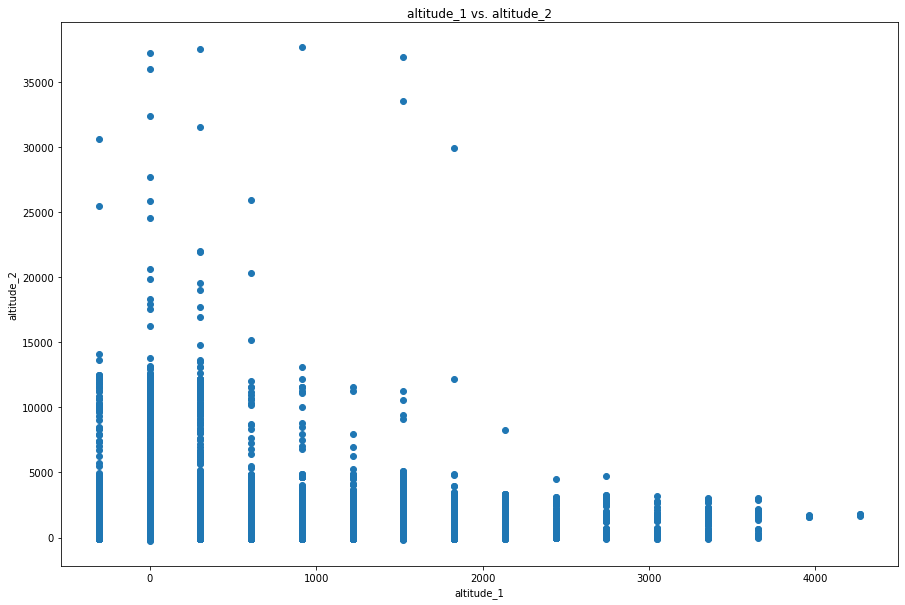

In [39]:
plt.figure(figsize = (15,10))
plt.scatter(x = flight_8['altitude_1'], y = flight_8['altitude_2'])
plt.title('altitude_1 vs. altitude_2')
plt.xlabel('altitude_1')
plt.ylabel('altitude_2')
plt.show()

### Conclusions

1. The relationship between latitude_1 and latitude_2 is positively strong correlation.

2. The relationship between longtitude_1 and longtitude_2 is positively strong correlation.

3. The relationship between altitude_1 and altitude_2 is positively small correlation.

4. The relationship between longtitude_1 and latitude_1, altitude_1, longtitude_2, altitude_2 are negatively small correlation.

5. The relationship between latitude_1 and longtitude_1, altitude_1, longtitude_2, altitude_2 are negatively small correlation.


# Step 3: Feature Engineering

## Binning Continuous Features

In [40]:
flight_8['altitude_2'] = pd.qcut(flight_8['altitude_2'], 13)

In [44]:
flight_8

,callsign,number,icao24,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,altitude_1,latitude_2,longitude_2,altitude_2
20,DAL1358,DL1358,abc573,PANC,KSEA,2021-08-01 00:00:03+00:00,2021-08-01 03:19:48+00:00,2021-08-01 00:00:00+00:00,61.202820,-150.016054,0.0,47.444644,-122.318045,"(53.34, 91.44]"
26,AAL2251,AA2251,ac4dfb,KGPM,KBWI,2021-08-01 00:00:03+00:00,2021-08-01 02:26:07+00:00,2021-08-01 00:00:00+00:00,32.771347,-97.014825,1219.2,39.164978,-76.663135,"(7.62, 53.34]"
1854,UAL815,UA815,a8f77c,KFDK,KIAD,2021-08-01 00:00:05+00:00,2021-08-01 00:13:19+00:00,2021-08-01 00:00:00+00:00,39.451675,-77.370320,1524.0,38.945812,-77.440964,"(91.44, 121.92]"
1888,SIL76,3M76,a968c5,KFLL,KORL,2021-08-01 00:00:05+00:00,2021-08-01 00:47:29+00:00,2021-08-01 00:00:00+00:00,26.081590,-80.132059,304.8,28.603729,-81.282930,"(746.76, 1539.24]"
1943,AAL72,AA72,ab3fc4,YSSY,KLAX,2021-08-01 00:00:05+00:00,2021-08-01 12:36:59+00:00,2021-08-01 00:00:00+00:00,-33.831528,151.223051,914.4,33.947428,-118.428612,"(-281.941, 7.62]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794202,AWI3742,ZW3742,a5b768,KORD,KMKE,2021-08-31 23:13:43+00:00,2021-08-31 23:30:27+00:00,2021-08-31 00:00:00+00:00,41.987732,-87.881948,304.8,42.925552,-87.898545,"(266.7, 312.42]"
2794239,QXE2551,QX2551,a4ae15,KPDX,KSEA,2021-08-31 23:17:00+00:00,2021-08-31 23:46:06+00:00,2021-08-31 00:00:00+00:00,45.592758,-122.591813,0.0,47.434449,-122.318115,"(121.92, 160.02]"
2794276,KAP1107,9K1107,a2941c,KBNA,36TN,2021-08-31 23:19:40+00:00,2021-08-31 23:33:13+00:00,2021-08-31 00:00:00+00:00,36.128952,-86.682301,304.8,36.497818,-87.074032,"(1539.24, 37703.76]"
2794279,FDX701,FX701,a8a73d,KCVG,07KY,2021-08-31 23:20:03+00:00,2021-08-31 23:42:33+00:00,2021-08-31 00:00:00+00:00,39.076355,-84.670496,914.4,38.117159,-85.725781,"(365.76, 487.68]"


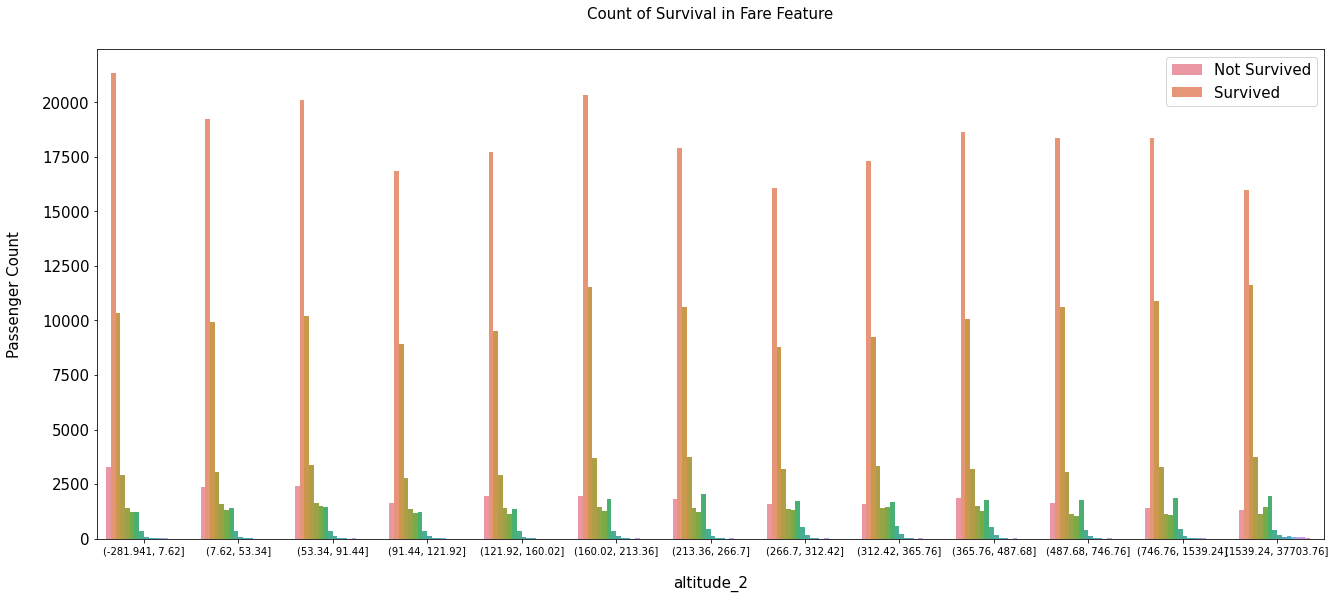

In [43]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='altitude_2', hue='altitude_1', data=flight_8)

plt.xlabel('altitude_2', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of flights in {} Feature'.format(''), size=15, y=1.05)

plt.show()